# Music Data Analysis
## Albums Sales & Popularity Data Analysis
### James Bond 12/18/2019

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [131]:
albums = pd.read_csv("./albums.csv")
print(f"Data Shape: {week.shape}")
print(week.head())
year = pd.read_csv("./year.csv")
print(f"Data Shape: {year.shape}")
print(year.head())

Data Shape: (300600, 8)
         date  Rank              Title                              Artist  \
0  1955-01-01     1   Poor Little Fool                        Ricky Nelson   
1  1955-01-01     2           Patricia       Perez Prado And His Orchestra   
2  1955-01-01     3      Splish Splash                         Bobby Darin   
3  1955-01-01     4  Hard Headed Woman  Elvis Presley With The Jordanaires   
4  1955-01-01     5               When                         Kalin Twins   

   Weeks on chart  year  Spotify_Popularity  Artist_Popularity  
0             1.0  1955                  -1                 56  
1             NaN  1955                  -1                 12  
2             NaN  1955                  -1                 62  
3             NaN  1955                  -1                 -1  
4             NaN  1955                  -1                 24  
Data Shape: (5300, 6)
   year  Rank           Artist                        Title  \
0  1960     1      Percy Faith  

### First five rows of weekly popularity data set

In [133]:
albums.head(5)

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
1,2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
2,3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
3,4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
4,5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


### First five rows of yearly data set

In [43]:
year.head(5)

,year,Rank,Artist,Title,Spotify_Popularity,Artist_Popularity
0,1960,1,Percy Faith,Theme From “A Summer Place”,52,52
1,1960,2,Jim Reeves,He’ll Have To Go,-1,60
2,1960,3,Everly Brothers,Cathy’s Clown,-1,62
3,1960,4,Johnny Preston,Running Bear,-1,34
4,1960,5,Mark Dinning,Teen Angel,-1,22


In [134]:
print(albums.describe, year.describe)

<bound method NDFrame.describe of            id  artist_id                           album_title        genre  \
0           1       1767    Call me Cat Moneyless That Doggies         Folk   
1           2      23548                             Down Mare        Metal   
2           3      17822                    Embarrassed Hungry       Latino   
3           4      19565  Standard Immediate Engineer Slovakia          Pop   
4           5      24941              Decent Distance Georgian  Black Metal   
...       ...        ...                                   ...          ...   
99995   99996      44624     Mike Pies Malay Albanian Terrible     Pop-Rock   
99996   99997      16345                                Global        Retro   
99997   99998      32674                                  MINI        Indie   
99998   99999      10134             Marketing Belligerent Toe          Pop   
99999  100000      41286                  Lover Barbie Of Rock         Rock   

       year_of_pu

In [136]:
print(albums.info, year.info)

<bound method DataFrame.info of            id  artist_id                           album_title        genre  \
0           1       1767    Call me Cat Moneyless That Doggies         Folk   
1           2      23548                             Down Mare        Metal   
2           3      17822                    Embarrassed Hungry       Latino   
3           4      19565  Standard Immediate Engineer Slovakia          Pop   
4           5      24941              Decent Distance Georgian  Black Metal   
...       ...        ...                                   ...          ...   
99995   99996      44624     Mike Pies Malay Albanian Terrible     Pop-Rock   
99996   99997      16345                                Global        Retro   
99997   99998      32674                                  MINI        Indie   
99998   99999      10134             Marketing Belligerent Toe          Pop   
99999  100000      41286                  Lover Barbie Of Rock         Rock   

       year_of_pub 

In [137]:
X = year['Spotify_Popularity'].values
y = year['Artist_Popularity'].values

In [140]:
X

array([[52],
       [-1],
       [-1],
       ...,
       [61],
       [66],
       [71]])

In [141]:
X=X.reshape(-1,1)
X

array([[52],
       [-1],
       [-1],
       ...,
       [61],
       [66],
       [71]])

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4240, 1)
y_train shape (4240,)
X_test shape (1060, 1)
y_test shape (1060,)
[ 88  61  -1 ...  79 100  49]


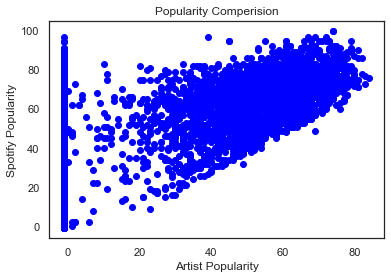

In [144]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Artist Popularity' )
plt.ylabel('Spotify Popularity')
plt.title('Popularity Comperision')
plt.show()

In [145]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 33.88 %
Test accuracy 32.56 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

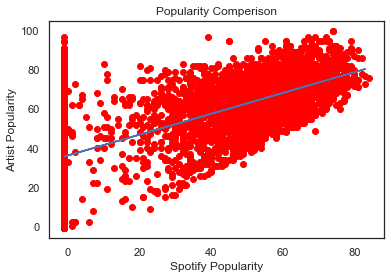

In [146]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Spotify Popularity")
plt.ylabel("Artist Popularity")
plt.title("Popularity Comperison")
plt.plot

In [147]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

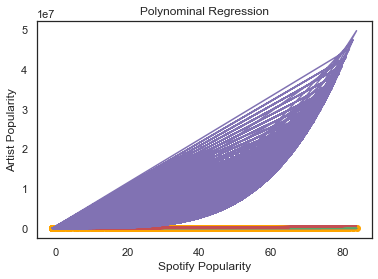

In [148]:
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel('Spotify Popularity')
plt.ylabel('Artist Popularity')
plt.title('Polynominal Regression')
plt.show()

Data Shape: (5300, 6)


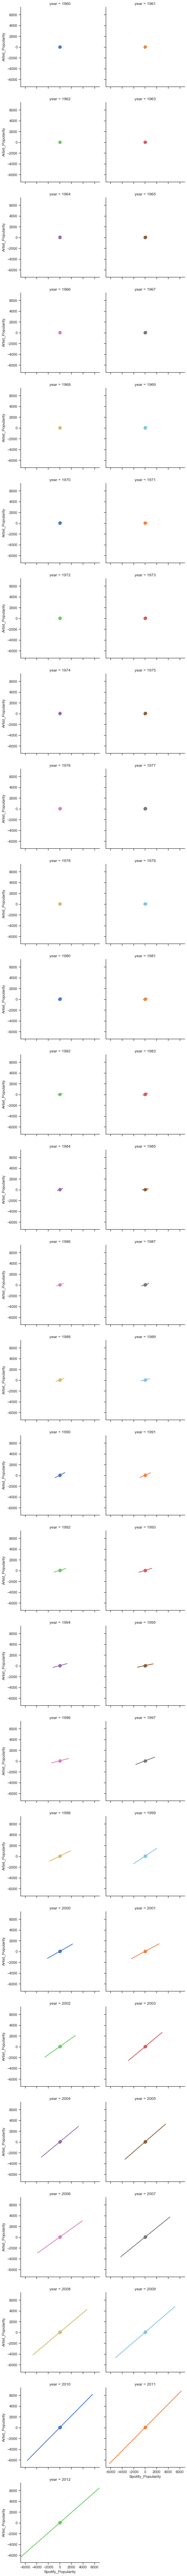

In [149]:
uniform_data = np.random.rand(10,12)
data = pd.DataFrame({'x':np.arange(1,10001),'y':np.random.normal(0,4,10000)})
year = pd.read_csv("./year.csv")
print(f"Data Shape: {year.shape}")

sns.set(style="ticks")

sns.lmplot(x="Spotify_Popularity", y="Artist_Popularity", col="year", hue="year", data=year,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

#### In my data analysis using mathlibpot and seaborn spotify popularity and artist popularity is starting show colleration after 2005. Spotify is not old enough for 2003 however Spotify users do not show popularity to songs earlier than 2003. We have tested it 100 , 500, 1000 and 10000 random variables really breaking point year is 2005.

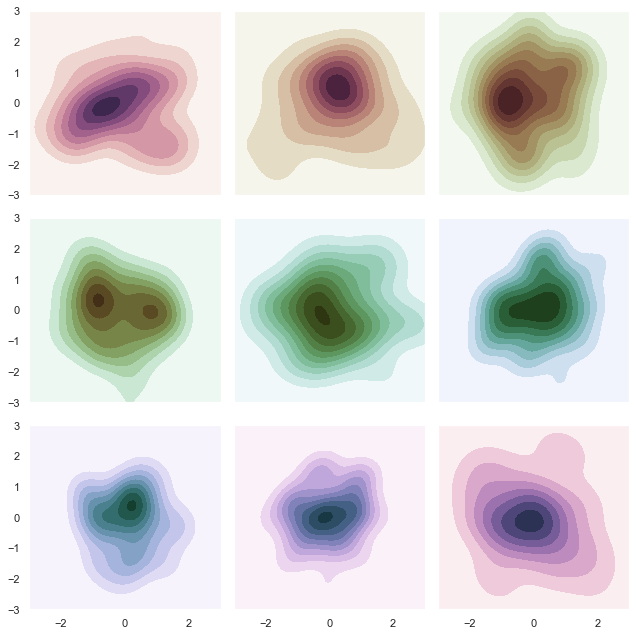

In [150]:
sns.set(style="dark")
year = np.random.RandomState(5000)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = year.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

### Also above analysis shows that majority of spotify popularity is not cover up artist popularity 

In [151]:
albums['num_of_sales'] = albums['num_of_sales']/1000

In [152]:
albums.head(1)

,id,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
0,1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905.193,4.0,1.5,3.0


Text(0, 0.5, 'Sales Numbers (in Thousands)')

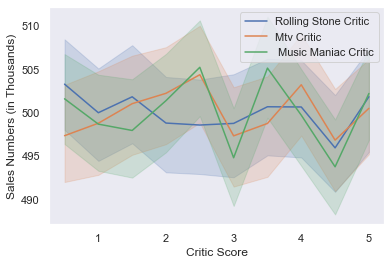

In [160]:
sns.lineplot(x="rolling_stone_critic", y="num_of_sales", data=albums, label="Rolling Stone Critic")
sns.lineplot(x="mtv_critic", y="num_of_sales", data=albums, label="Mtv Critic")
sns.lineplot(x="music_maniac_critic", y="num_of_sales", data=albums, label=" Music Maniac Critic")
plt.xlabel('Critic Score')
plt.ylabel('Sales Numbers (in Thousands)')

### Here is my another analysis about 3 Music Critic authorities, Rolling Stone, MTV and Music Maniac. From this analysis 3 Authorities mostly same opinion and good catch giving top critic for high sale albums. Rolling Stone seems more accurate about it. Music Maniac critics the most independent than sales numbers, MTV critics between 1 and 3 is more accurate about sales slope. Rolling Stone behaves giving bad critics by not caring of sales numbers or their album critic opinions are the farest from the reality of music market.Music Maniacs are behaving in similar line, MTV has good catch about giving low critics to lower sales number albums. This graphic tells us that the critics of these 3 authorities are matching the sales trends of the albums well.     